## Aviator Data Analysis

In [1]:
import pandas as pd
import os

In [2]:
data = pd.read_csv('aviator_dataset.csv')
data.head()

,id,created_at,updated_at,app,payout
0,14fd5f1c-1c54-4649-81a3-904ee34bf1fb,2024-05-19 16:52:46.750519+00,2024-05-19 16:52:46.750537+00,ODIBETS,1.96
1,625770cc-75ac-4d54-b0a2-3d7d0c13324d,2024-05-19 16:52:46.43971+00,2024-05-19 16:52:46.439734+00,BETIKA,1.21
2,9039618f-b2b6-4500-9c19-032566b4fae1,2024-05-19 16:52:43.210589+00,2024-05-19 16:52:43.210605+00,BETGR8,2.56
3,0fea4358-93a3-400a-85f0-a3925a274092,2024-05-19 16:52:32.817905+00,2024-05-19 16:52:32.817926+00,BETGR8,2.00
4,787599b9-e936-47e0-81d5-df5af2e61dde,2024-05-19 16:52:32.234832+00,2024-05-19 16:52:32.234841+00,BETIKA,1.18


### Question 1: What is the distribution of payouts for each app?
### Tasks:

#### Calculate summary statistics for payouts.
#### Plot the distribution of payouts for each app.

            count       mean          std  min   25%   50%   75%        max
app                                                                        
BETGR8   100692.0  11.218818   276.854595  1.0  1.29  1.93  3.90   53142.90
BETIKA   100868.0  11.960880   463.289334  1.0  1.29  1.94  3.90  131424.54
ODIBETS  113979.0  13.259597   680.492723  1.0  1.29  1.95  3.90  207144.08
WINPESA  104323.0  16.653821  1402.571375  1.0  1.28  1.93  3.88  432955.52


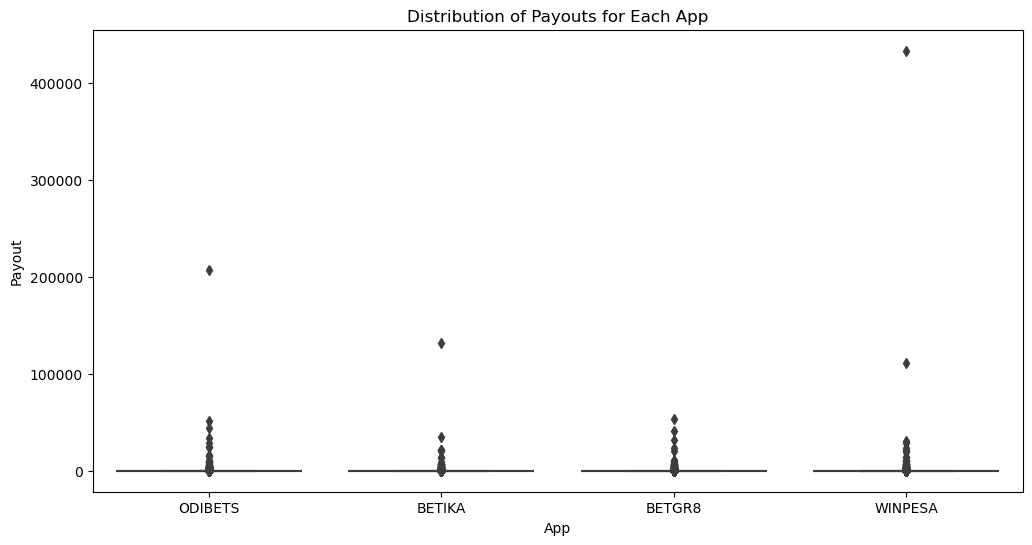

In [3]:
# Summary statistics for payouts
summary_stats = data.groupby('app')['payout'].describe()
print(summary_stats)

# Plotting distribution of payouts for each app
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='app', y='payout', data=data)
plt.title('Distribution of Payouts for Each App')
plt.xlabel('App')
plt.ylabel('Payout')
plt.show()

### Answer 1:
#### Mean (Average Payout)

##### BETGR8: The average payout is approximately 11.22.
##### BETIKA: The average payout is approximately 11.96.
##### ODIBETS: The average payout is approximately 13.26.
##### WINPESA: The average payout is approximately 16.65.

##### This shows that on average, users tend to receive higher payouts from WINPESA and ODIBETS compared to BETGR8 and BETIKA.

## Question 2: How do the payout values vary over time?
### Tasks:

#### Convert created_at and updated_at to datetime format.
#### Extract the date from created_at.
#### Group by app and date, and calculate the average payout.
#### Plot bar graphs for each app.

         app        date     payout
0     BETGR8  2024-04-13  11.596287
1     BETGR8  2024-04-14   9.162290
2     BETGR8  2024-04-15  11.447081
3     BETGR8  2024-04-16   8.683370
4     BETGR8  2024-04-17   9.466487
..       ...         ...        ...
143  WINPESA  2024-05-15  10.894975
144  WINPESA  2024-05-16  53.813710
145  WINPESA  2024-05-17  24.026589
146  WINPESA  2024-05-18   9.891948
147  WINPESA  2024-05-19   7.186294

[148 rows x 3 columns]


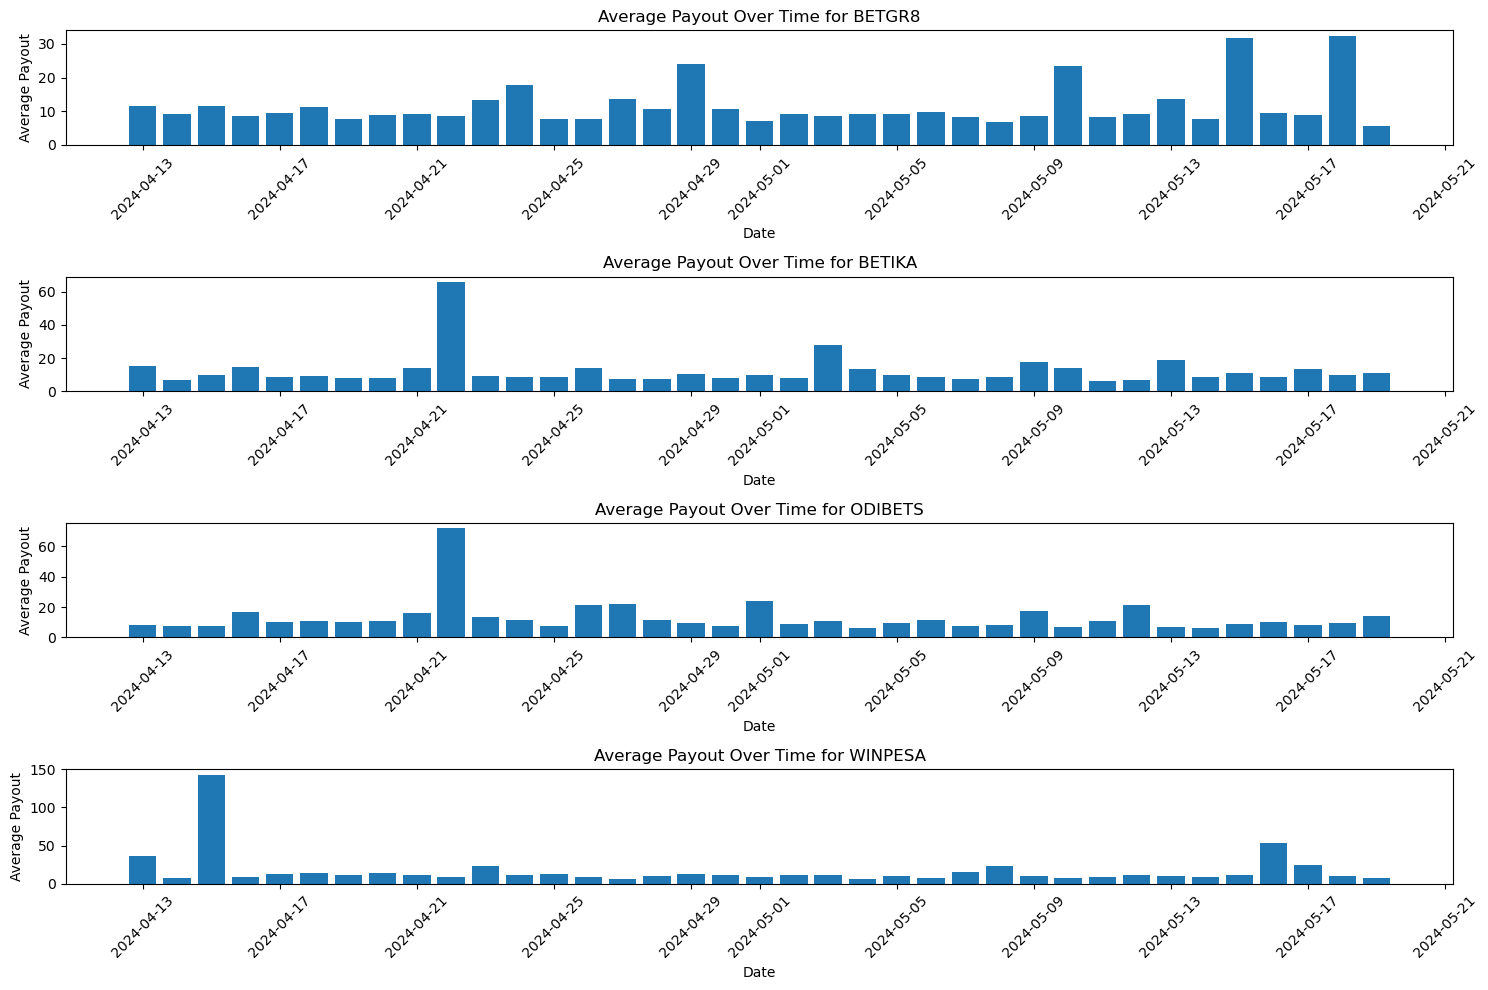

In [4]:
# Task 1: Convert 'created_at' and 'updated_at' to datetime format
data['created_at'] = pd.to_datetime(data['created_at'], format='mixed', errors='coerce')
data['updated_at'] = pd.to_datetime(data['updated_at'], format='mixed', errors='coerce')

# Drop rows where conversion failed
data = data.dropna(subset=['created_at', 'updated_at'])

# Task 2: Extract the date from 'created_at'
data['date'] = data['created_at'].dt.date

# Task 3: Group by app and date, then calculate the average payout
grouped_data = data.groupby(['app', 'date'])['payout'].mean().reset_index()
print(grouped_data)
# Task 4: Plotting bar graphs for each app
apps = grouped_data['app'].unique()
plt.figure(figsize=(15, 10))

for i, app in enumerate(apps):
    plt.subplot(len(apps), 1, i + 1)
    app_data = grouped_data[grouped_data['app'] == app]
    plt.bar(app_data['date'], app_data['payout'])
    plt.title(f'Average Payout Over Time for {app}')
    plt.xlabel('Date')
    plt.ylabel('Average Payout')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Question 3: What is the frequency of records for each app?
### Tasks:

### Count the number of records for each app.
### Plot a bar chart showing the frequency of records for each app.


app
ODIBETS    113979
WINPESA    104323
BETIKA     100868
BETGR8     100692
Name: count, dtype: int64


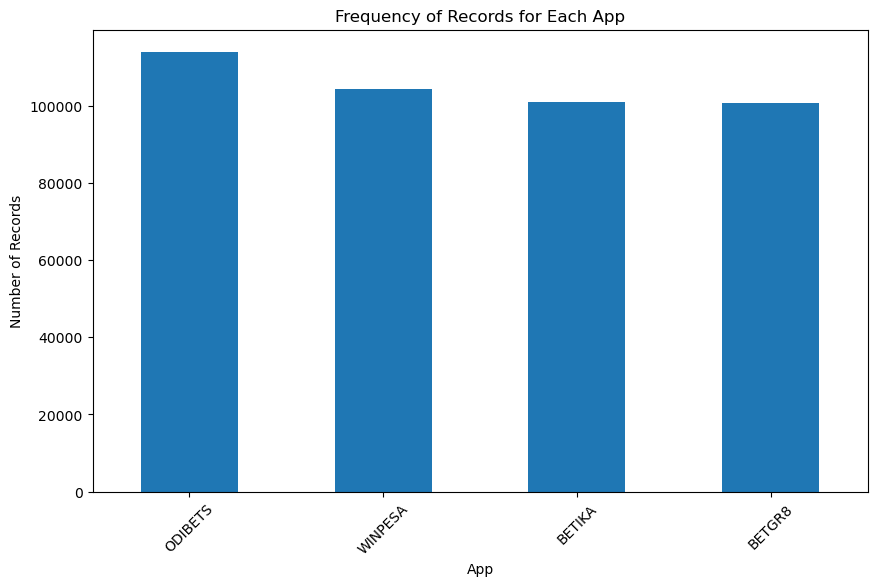

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('aviator_dataset.csv')

# Task 1: Count the number of records for each app
app_counts = data['app'].value_counts()
print(app_counts)

# Task 2: Plot the frequency of records for each app
plt.figure(figsize=(10, 6))
app_counts.plot(kind='bar')
plt.title('Frequency of Records for Each App')
plt.xlabel('App')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.show()

### Interpretation for question 3:
##### ODIBETS    113979
##### WINPESA    104323
##### BETIKA     100868
##### BETGR8     100692

#### ODIBETS has the highest number of records, indicating it might be the most frequently used or the most popular app in the dataset.
  
##### Knowing the number of records for each app can be useful for further analysis, such as identifying which app has the most data and might have the most significant impact on any aggregate analysis.
##### Knowing the volume of data per app can help in allocating resources efficiently. For example, focusing more on apps with higher usage.


In [9]:
# Task 1: Identifying outliers in the payout data
Q1 = data.groupby('app')['payout'].quantile(0.25)
Q3 = data.groupby('app')['payout'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['payout'] < (Q1 - 1.5 * IQR)) | (data['payout'] > (Q3 + 1.5 * IQR))]
print(outliers)

# Task 2: Plotting boxplots to visually inspect outliers for each app
plt.figure(figsize=(12, 6))
sns.boxplot(x='app', y='payout', data=data)
plt.title('Boxplot of Payouts for Each App (With Outliers)')
plt.xlabel('App')
plt.ylabel('Payout')
plt.show()


ValueError: Can only compare identically-labeled Series objects

                                          id                     created_at  \
1       fc63d1b4-87bc-4b33-98b6-112673eef4fb  2024-05-19 16:52:27.155058+00   
2       2d88c8a8-c556-4b66-b99d-9eba42ea7253  2024-05-19 16:51:33.795794+00   
4       c6cf95eb-7a63-432c-889b-aa928a2251b1   2024-05-19 16:50:09.37517+00   
6       fad1b531-b2e9-467c-bcaa-c5eb1c674b8b  2024-05-19 16:49:27.261519+00   
8       a185039a-47b3-4649-a41c-9b037c09690b  2024-05-19 16:48:22.545891+00   
...                                      ...                            ...   
419818  9d1652d4-4785-4d99-acf8-f0f1d6ae5c4e  2024-04-13 19:00:15.876273+00   
419824  2c431cb3-a54d-4b86-8cd0-e14f2099d09f  2024-04-13 19:00:15.876086+00   
419839  2f4d9571-336a-492e-b43d-5ca0e043886a  2024-04-13 19:00:15.875481+00   
419853  ef9cec58-e71d-4539-a06d-adb69766bd4a  2024-04-13 19:00:15.874954+00   
419860  8bbfb6b6-08e5-4ba4-acf9-ebca59fcf998  2024-04-13 19:00:15.874732+00   

                           updated_at      app  pay

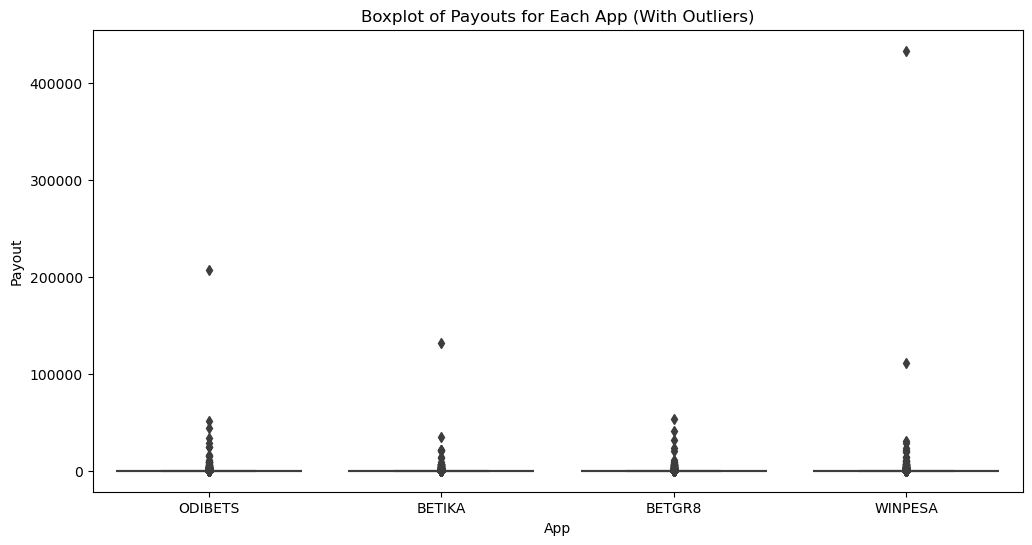

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('aviator_dataset.csv')

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each app
Q1 = data.groupby('app')['payout'].quantile(0.25)
Q3 = data.groupby('app')['payout'].quantile(0.75)
IQR = Q3 - Q1

# Merge Q1, Q3, and IQR back to the original data
data = data.merge(Q1.rename('Q1'), on='app')
data = data.merge(Q3.rename('Q3'), on='app')
data = data.merge(IQR.rename('IQR'), on='app')

# Identify outliers
data['is_outlier'] = (data['payout'] < (data['Q1'] - 1.5 * data['IQR'])) | (data['payout'] > (data['Q3'] + 1.5 * data['IQR']))
outliers = data[data['is_outlier']]
print(outliers)

# Plotting boxplots to visually inspect outliers for each app
plt.figure(figsize=(12, 6))
sns.boxplot(x='app', y='payout', data=data)
plt.title('Boxplot of Payouts for Each App (With Outliers)')
plt.xlabel('App')
plt.ylabel('Payout')
plt.show()


### Question 5: What is the correlation between payout and creation time?
### Tasks:

##### Convert the created_at column to datetime format.
##### Convert the datetime to a numeric format (timestamps).
##### Calculate the correlation between payout and the numeric creation time.
##### Plot a scatter plot to visualize the relationship.

Correlation between payout and creation time: -0.0019469433499556584


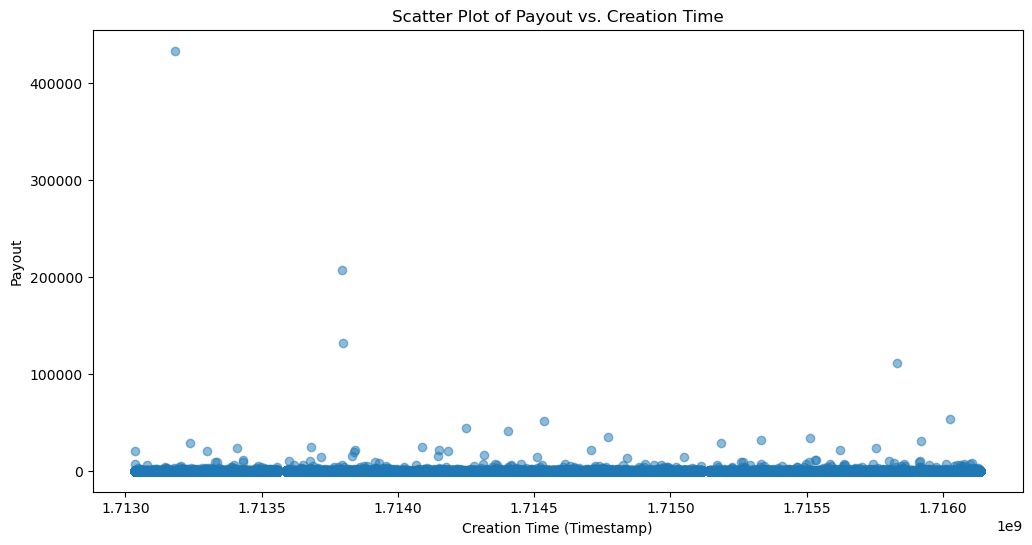

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('aviator_dataset.csv')

# Task 1: Convert the 'created_at' column to datetime format
data['created_at'] = pd.to_datetime(data['created_at'], format='ISO8601', errors='coerce')

# Drop rows with NaT values that could not be converted
data = data.dropna(subset=['created_at'])

# Task 2: Convert datetime to timestamp
data['created_at_timestamp'] = data['created_at'].astype('int64') // 10**9  # Convert to seconds

# Task 3: Calculate the correlation between payout and creation time
correlation = data['payout'].corr(data['created_at_timestamp'])
print(f'Correlation between payout and creation time: {correlation}')

# Task 4: Plot a scatter plot to visualize the relationship
plt.figure(figsize=(12, 6))
plt.scatter(data['created_at_timestamp'], data['payout'], alpha=0.5)
plt.title('Scatter Plot of Payout vs. Creation Time')
plt.xlabel('Creation Time (Timestamp)')
plt.ylabel('Payout')
plt.show()


#### Question 5 Interprentation
###### The correlation coefficient between payout and creation time is −0.0019469433499556584
###### This indicates that there is almost no linear relationship between payout and creation time.
###### In practical terms, the payout values do not significantly increase or decrease over time.